In [3]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
#from sklearn.multiclass import MSE_binary

In [4]:
train_data=np.loadtxt("wine_train.csv", dtype=np.float, delimiter=",")
train_X_data,train_label=train_data[:,:-1],train_data[:,-1]
test_data=np.loadtxt("wine_test.csv", dtype=np.float, delimiter=",")
test_X_data,test_label=test_data[:,:-1],test_data[:,-1]
#print np.mean(train_data,axis=0)
#print np.std(train_data,axis=0)

In [6]:
scaler = StandardScaler()
print(scaler.fit(train_X_data)) #get standerdize parameter

train_X_data_std=scaler.transform(train_X_data) #standerdize taining set
# print np.mean(train_X_data_std,axis=0)
# print np.std(train_X_data_std,axis=0)

test_X_data_std=scaler.transform(test_X_data) #standerdize test set using parameter get from training data
# print np.mean(test_X_data_std,axis=0)
# print np.std(test_X_data_std,axis=0)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
############## Perceptron #####################

In [76]:
model = Perceptron(max_iter=1000, random_state=None, tol=1e-15)
model.fit(train_X_data_std[:,:2], train_label)
print "2FEATURE,TRAINING SCORE IS: %s" %model.score(train_X_data_std[:,:2],train_label)
print "2FEATURE,TESTING SCORE IS: %s" %model.score(test_X_data_std[:,:2],test_label)

print model.coef_
print model.intercept_

2FEATURE,TRAINING SCORE IS: 0.6966292134831461
0.6741573033707865
[[ 2.53232585 -1.81313114]
 [-4.03313095  0.05439393]
 [ 1.14791643  0.29916664]]
[-1.  1. -2.]


In [77]:
model = Perceptron(max_iter=1000, random_state=None, tol=1e-15)
model.fit(train_X_data_std, train_label)
print "13FEATURE,TRAINING SCORE IS: %s" %model.score(train_X_data_std,train_label)
print "13FEATURE,TRAINING SCORE IS: %s" %model.score(test_X_data_std,test_label)
print model.coef_
print model.intercept_

13FEATURE,TRAINING SCORE IS: 1.0
13FEATURE,TRAINING SCORE IS: 0.9325842696629213
[[ 2.36904286 -0.0815909   1.99692494 -1.84759663  2.82381873 -0.03345839
   2.28086455  1.02041994  1.44923803  0.75069056  0.7953367   3.07044448
   3.2056101 ]
 [-4.18887359 -3.70785319 -2.26567844  2.98605079 -3.23985811  1.35351061
   2.60644055  2.35668414 -0.5893236  -8.09515836  1.79231769  0.58287193
  -4.29807763]
 [ 1.1019888   2.58371188  2.45541101  0.37386432  1.84107149 -1.54767895
  -3.62556064 -2.61646137 -0.90598128  6.37998185 -2.4805278  -1.66878735
  -0.04666695]]
[-4. -5. -8.]


In [123]:
result_train_score = 0
for _ in range(100):
    model = Perceptron(max_iter=1000, random_state=None, tol=1e-15)
    model.fit(train_X_data_std, train_label)
    score = model.score(train_X_data_std,train_label)
    if score>result_train_score:
        result_train_score = score
        result_test_score = model.score(test_X_data_std,test_label)
    
        w = model.coef_
        w0 = model.intercept_

In [124]:
print result_train_score
print result_test_score
print w
print w0

1.0
0.9325842696629213
[[ 3.62581462  1.3507827   3.35221634 -2.684495    1.9586901  -1.10741777
   5.00996113 -0.39340366 -2.18900515 -0.14351162  3.49207253  3.01515474
   4.15281028]
 [-4.35311626 -3.34522696 -4.4404005   1.61510685 -2.72855737  0.23457438
  -0.19937713  2.36229084  1.89683345 -8.36498451  1.11036314 -1.4762051
  -6.22923371]
 [-0.68795469  1.09694434  0.94825125  0.67768988  1.44738936 -0.0698421
  -2.72005619 -0.89800692 -1.20313317  6.08627603 -2.63740569 -2.77691185
  -0.33811598]]
[-4. -6. -3.]


In [ ]:
################## MSE #################

In [137]:

binary_model = MSE_binary()
model = OneVsRestClassifier(binary_model)
model.fit(train_X_data_std[:,:2], train_label)
print model.score(train_X_data_std[:,:2],train_label)
print model.score(test_X_data_std[:,:2],test_label)

Calling MSE function...
Calling MSE function...
Calling MSE function...
Calling MSE function...
0.7640449438202247
0.7528089887640449


In [131]:
class MSE_binary(LinearRegression):
    def __init__(self):
        #print("Calling MSE function...")
        super(MSE_binary, self).__init__()
    def predict(self, X):
        thr = 0.5
        y = self._decision_function(X)
        y_int = (np.zeros(y.shape)).astype(int)
        y_int[y>thr] = 1
        return y_int

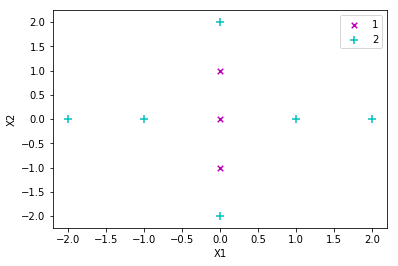

In [149]:
import matplotlib.pyplot as plt
x=np.array([[0,0],[0,1],[0,-1],[-2,0],[-1,0],[0,2],[0,-2],[1,0],[2,0]])
f2 = plt.figure(2)
p1 = plt.scatter(x[:3,0], x[:3,1], marker = 'x', color = 'm', label='1', s = 30)

p2 = plt.scatter(x[3:,0], x[3:,1], marker = '+', color = 'c', label='2', s = 50)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc = 'upper right')

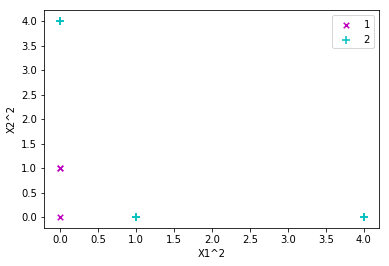

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x=np.array([[0,0],[0,1],[0,-1],[-2,0],[-1,0],[0,2],[0,-2],[1,0],[2,0]])
f2 = plt.figure(2)
p1 = plt.scatter(x[:3,0]**2, x[:3,1]**2, marker = 'x', color = 'm', label='1', s = 30)

p2 = plt.scatter(x[3:,0]**2, x[3:,1]**2, marker = '+', color = 'c', label='2', s = 50)
plt.xlabel('X1^2')
plt.ylabel('X2^2')
plt.legend(loc = 'upper right')

In [4]:
plt.contour(x, y, x^2/9-y^2/4-1, 0)

NameError: name 'y' is not defined